In [123]:
from qutip import *
from qutip.qip.operations import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [124]:
#brute force the alpha beta, no lindblad evolution

# Creating arbitrary state

In [125]:
def genstate():
    #every run of this cell will generate new alpha beta
    alpha = np.random.random()
    beta = np.sqrt(1-alpha**2)
    #print('alpha =',alpha, '\nbeta =', beta, '\ncheck=', alpha**2+beta**2)
    return(alpha, beta)
#Note that this does not generate uniform(0,1) for beta.

# Making Zs operator and SWAP

In [149]:
#Zs operator
theta = 0.01
#weak_sz = np.exp(np.imag*sigmaz()*theta/2)
weak_sz = qeye(2) * np.cos(theta/2) + 1*sigmaz() * np.sin(theta/2)
Z = tensor(weak_sz, qeye(2))

#Ucnot operator
weak_sw = tensor(qeye(2),qeye(2)) * np.cos(theta) + 1* swap() * np.sin(theta)

#Hamiltonian
H = Z*weak_sw

# Measurement operators

In [150]:
e = basis(2,1)
g = basis(2,0)

proj0 = g * g.dag()
proj1 = e * e.dag()

#operators used to change state to post measurement state
m0 = tensor(qeye(2), proj0)
m1 = tensor(qeye(2), proj1)

#operators used to find prob of alpha,beta
n0 = tensor(proj0, qeye(2))
n1 = tensor(proj1, qeye(2))

# Creating post measurement state for each possible outcome and tensoring new env qubit and repeating.

In [183]:
arr_of_arr = []
count = 0
for j in range(0,100):
    j = j+1
    #creating sys env joint state psi
    alpha, beta = genstate()

    sys = (alpha*basis(2,0) + beta*basis(2,1)).unit()
    env = basis(2,0)
    psi = tensor(sys,g).unit()
    rho = psi*psi.dag()

    ########################################
    arr_e0_s0 = []
    arr_e0_s1 = []
    arr_e1_s0 = []
    arr_e1_s1 = []

    tlist = []
    psit0 = psi

    #set probs, based on probs do evolution of state. Currently state evolves with m0 by default and thats how a and b are 
    #being calculated
    n = 200
    for i in range(0,n):
        tlist = tlist + [i]
        #expectation value of m0 and m1
        #interact with ZUcnot
        psiH = (H*psit0).unit()
        #prob of no jump and yes jump
        p0 = expect(m0,psiH)
        p1 = 1-p0
        #create RNG number r
        r = np.random.random()
        #no jump case
        if(r<p0):
            #measure env 0, new state with env 0
            psit0 = (m0*psiH).unit()
            #measure sys 0
            e0_s0 = expect(n0,psit0)
            arr_e0_s0 = arr_e0_s0 + [e0_s0]
            #measure sys 1
            e0_s1 = expect(n1,psit0)
            arr_e0_s1 = arr_e0_s1 + [e0_s1]
            psit0 = tensor((psit0[0][0][0]*g + psit0[2][0][0]*e), g) 
            continue
        else:
            count = count + 1
            #measure env 1, new state w env 1
            psit0 = (m1*psiH).unit()
            #measure sys 0
            e1_s0 = expect(n0,psit0)
            arr_e0_s0 = arr_e0_s0 + [e1_s0]
            arr_e0_s0 = arr_e0_s0 + [0]*(n-i-1)
            #measure sys 1
            e1_s1 = expect(n1,psit0)
            arr_e0_s1 = arr_e0_s1 + [e1_s1] + [0]*(n-i-1)
            break
        #reinitialize, adds new env qubit
    arr_of_arr = arr_of_arr + [arr_e0_s1]

In [184]:
for i in arr_of_arr:
    print(len(i))
print('tlist',len(tlist))

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
tlist 200


In [185]:
count

0

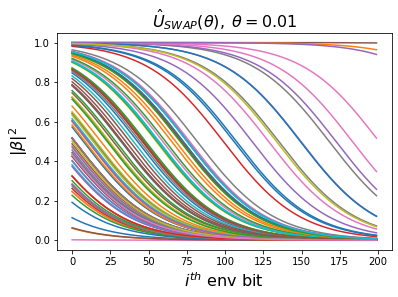

In [186]:
for i in arr_of_arr:    
    plt.plot(tlist,i)
plt.title(r'$\hat{U}_{SWAP}(\theta), \; \theta = 0.01$', fontsize=16)
plt.xlabel(r'$i^{th}$ env bit', fontsize=16)
plt.ylabel(r'$|\beta|^2$' , fontsize=16)
#plt.ylabel('beta**2')
plt.savefig('Plots/swap_theta0.01_2.png', dpi = 300)
plt.show()